This document is made in Jupyter Notebook. Available on GitHub at: https://github.com/zhongyuex/BMEN90002-Workshops

# Part 1 - Auditory Neuron Simulation

In [52]:
import numpy as np
from scipy.signal import lfilter as lfilter
import matplotlib.pyplot as plt

def auditory_nerve(stimulus, dt):
    # spikes = auditory_nerve(stimulus, dt)
    #   Simulates a single auditory nerve fibre, creating a sequence of spikes
    #   every dt seconds.
    #   INPUT
    #       stimulus: sampled input stimulus, such as a sine wave
    #       dt: sampling period in seconds
    #   OUTPUT
    #       spikes: array of spike times in seconds

    # sanity checks
    if (dt > 1/4000):
        raise(Error, 'dt must to be no more than 0.00025')

    beta = 0.05

    bandwidth = 1/dt/2;

    # Set up a filter
    th_freqs = np.array([0, 700, 1800, 2500, bandwidth])/bandwidth;
    th_filt  = [0,   0,    1,    0,    0];

    b = [-0.0002,-0.0001,0.0002,0.0005,0.0001,-0.0006,-0.0004,0.0007,0.0009,-0.0004,-0.0015,-0.0021,-0.0031,-0.0011,0.0061,0.0083,-0.0056,-0.0171,0.0077,0.0533,0.0435,-0.0528,-0.1363,-0.079,0.0883,0.1807,0.0883,-0.079,-0.1363,-0.0528,0.0435,0.0533,0.0077,-0.0171,-0.0056,0.0083,0.0061,-0.0011,-0.0031,-0.0021,-0.0015,-0.0004,0.0009,0.0007,-0.0004,-0.0006,0.0001,0.0005,0.0002,-0.0001,-0.0002];

    filt_stim = lfilter(b, 1, stimulus);
    rate = (300 * (2 / (1 + np.exp(-beta*(filt_stim)))-1)) * (0.1*(filt_stim < -26) + (filt_stim > 26)) + 30;
    print(rate)
    spikes = []
    for i, x in enumerate(np.random.rand(len(rate))):
        if  x < rate[i] * dt:
            spikes.append(i*dt)
    
    return spikes

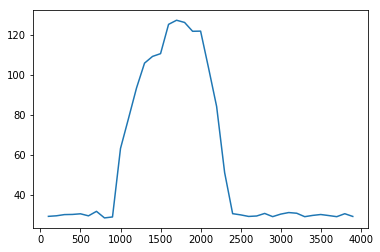

In [57]:
Fs = 10000            # Sampling rate for the stimuli
dt = 1/Fs             # Corresponding sampling period
t = np.arange(0,1,dt)            # Stimulation time in seconds
fstep = 100
frange = np.arange(100,4000,fstep)
ntrials = 50
nspikes = np.zeros(len(frange))

for trial in range(ntrials):
    for f in frange:
        stimulus = 100*np.sin(2*np.pi*f*t) # Pure tone stimulus
        index = (f-frange[0])//fstep;
        # Number of spikes
        nspikes[index] += len(auditory_nerve(stimulus, dt));
nspikes = nspikes/ntrials

plt.plot(frange, nspikes)

## Q1: Characteristic Frequency
The characteristic frequency is the global maximum of the stimuli frequency response curve. From observations of the stimulus frequency vs. firing rate plot, the characteristic frequency is located around 1700 Hz and 1800 Hz. To locate the true characteristic frequency, 10,000 additional simulations were ran on the target frequencies.

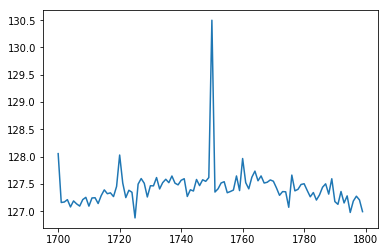

In [55]:
Fs = 10000            # Sampling rate for the stimuli
dt = 1/Fs             # Corresponding sampling period
t = np.arange(0,1,dt)            # Stimulation time in seconds
frange = np.arange(1700,1800,1)
ntrials = 10000
nspikes = np.zeros(len(frange))

for trial in range(ntrials):
    for f in frange:
        stimulus = 100*np.sin(2*np.pi*f*t) # Pure tone stimulus
        index = (f-frange[0]);
        # Number of spikes
        nspikes[index] += len(auditory_nerve(stimulus, dt));
nspikes = nspikes/ntrials

plt.plot(frange, nspikes)

The response shows that 

## Q2: Spontaneous Firing Rate
The spontaneous firing rate is found to be 30 Hz using simulations below:

In [56]:
Fs = 10000            # Sampling rate for the stimuli
dt = 1/Fs             # Corresponding sampling period
t = np.arange(0,1,dt)   # Stimulation time in seconds
n_trials = 1000
stimulus = np.zeros(len(t)*1000)
rate = len(auditory_nerve(stimulus, dt))/1000
rate

30.016